# Haberman-KNN-Classifier-Analysis

The code conducts a supervised classification analysis using the Decision Tree algorithm on the Haberman dataset, which contains information about the survival of patients who underwent surgery for breast cancer. It loads the dataset, preprocesses it by handling missing values and visualizing relationships between variables, splits it into training and testing sets, and trains and evaluates the Decision Tree model on both the original and normalized data. Finally, it examines the impact of different parameters on model performance through repeated iterations.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [2]:
#Haberman = cancer patient data set, för överlevnad efter operation.
df = pd.read_csv('haberman.data')

In [3]:
#30, 64, 1, 1.1 är inte speciellt enkelt att jobba med.
df.head

<bound method NDFrame.head of      30  64   1  1.1
0    30  62   3    1
1    30  65   0    1
2    31  59   2    1
3    31  65   4    1
4    33  58  10    1
..   ..  ..  ..  ...
300  75  62   1    1
301  76  67   0    1
302  77  65   3    1
303  78  65   1    2
304  83  58   2    2

[305 rows x 4 columns]>

In [4]:
# Hur tolkas denna data?
# Då det inte finns några kolummer skapar jag några för att göra detta enklare att tolka.

# col1: Age ...........= Ålder på patienten.
# col2: Operation Year = År då dem opererades.
# col3: Detected ......= Number of positive axillary nodes
# col4: Survival.......= 1: lever längre än 5 åt. 2: lever kortare än 5 år.

colnames = ['Age', 'Operation Year', 'Detected', 'Survival']
df = pd.read_csv('haberman.data', names=colnames, header=None)

,Age,Operation Year,Detected,Survival
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1
...,...,...,...,...
301,75,62,1,1
302,76,67,0,1
303,77,65,3,1
304,78,65,1,2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   Age             306 non-null    int64
 1   Operation Year  306 non-null    int64
 2   Detected        306 non-null    int64
 3   Survival        306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


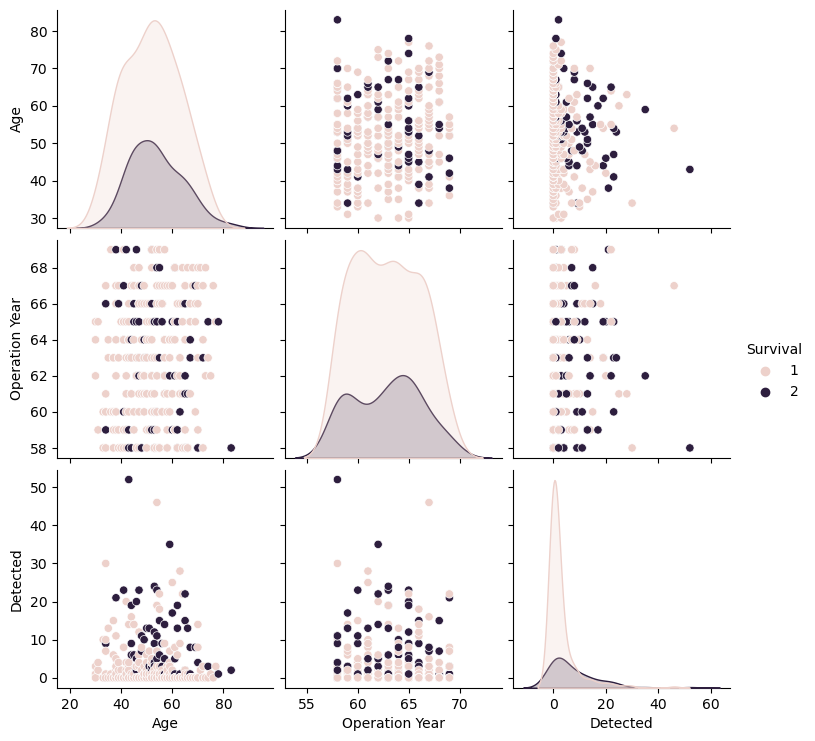

In [5]:
# Här kan vi se att våra nya kolumn namn faktiskt fungerar som dem ska.
display(round(df.round(), 1))
df.info()
sns.pairplot(df, hue='Survival')

In [6]:
# Vi ska splitta vårat data set till 75% traning och 25% test data.
# 0.25 = 25% & 75% träningsdata

x = df.drop('Survival', axis = 1)
y = df['Survival']
x_training_data, x_test_data, y_training_data, y_testing_data = train_test_split(x, y, test_size = 0.25)

model = DecisionTreeClassifier(random_state=1234) 
model.fit(x_training_data, y_training_data)
predictions = model.predict(x_test_data)

In [7]:
# Ej normaliserat.
# Ett accuracy score på 0.66 = 66% inte speciellt bra inom medicin
# 75% precision på 1, att dem lever
# dock 39% precision på 2, att dem dör.

print("confusion matrix:\n", confusion_matrix(y_testing_data, predictions))
print("accuracy score:\n", accuracy_score(y_testing_data, predictions))
print("Classification:\n", classification_report(y_testing_data, predictions))

from sklearn import tree
tree.plot_tree(model)

confusion matrix:
 [[41 15]
 [13  8]]
accuracy score:
 0.6363636363636364
Classification:
               precision    recall  f1-score   support

           1       0.76      0.73      0.75        56
           2       0.35      0.38      0.36        21

    accuracy                           0.64        77
   macro avg       0.55      0.56      0.55        77
weighted avg       0.65      0.64      0.64        77



[Text(0.5341631355932204, 0.9736842105263158, 'X[2] <= 4.5\ngini = 0.387\nsamples = 229\nvalue = [169, 60]'),
 Text(0.2823093220338983, 0.9210526315789473, 'X[0] <= 80.0\ngini = 0.303\nsamples = 172\nvalue = [140, 32]'),
 Text(0.2653601694915254, 0.868421052631579, 'X[1] <= 59.5\ngini = 0.297\nsamples = 171\nvalue = [140, 31]'),
 Text(0.17796610169491525, 0.8157894736842105, 'X[2] <= 3.5\ngini = 0.394\nsamples = 37\nvalue = [27, 10]'),
 Text(0.16101694915254236, 0.7631578947368421, 'X[0] <= 61.5\ngini = 0.375\nsamples = 36\nvalue = [27, 9]'),
 Text(0.1016949152542373, 0.7105263157894737, 'X[1] <= 58.5\ngini = 0.311\nsamples = 26\nvalue = [21, 5]'),
 Text(0.0847457627118644, 0.6578947368421053, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.11864406779661017, 0.6578947368421053, 'X[0] <= 55.5\ngini = 0.444\nsamples = 15\nvalue = [10, 5]'),
 Text(0.1016949152542373, 0.6052631578947368, 'X[0] <= 51.0\ngini = 0.496\nsamples = 11\nvalue = [6, 5]'),
 Text(0.0847457627118644, 0.5526315

In [8]:
# Nu när vi har normaliserat data från 0.00 till 1.00 blir saker lite annolunda.
# Accuracy score ligger nu på 71.4% vilket är bättre
# accuracy för 1, ligger på 71%
# men tyvärr blir 2, = 0 accuracy efter normaliseringen.

normData = df
normData.iloc[:, 0:3]=MinMaxScaler().fit_transform(df.iloc[:, 0:3])
normX_train, normX_test, normY_train, normY_test = x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(df[['Age', 'Operation Year', 'Detected']],
                                                                             df['Survival'], random_state=123, test_size=0.25)

normModel = DecisionTreeClassifier(random_state=1234)
normModel.fit(normX_train, normY_train)
predictions = model.predict(normX_test)

print("confusion matrix:\n", confusion_matrix(y_testing_data, predictions))
print("accuracy score:\n", accuracy_score(y_testing_data, predictions))
print("Classification:\n", classification_report(y_testing_data, predictions))

tree.plot_tree(normModel)

confusion matrix:
 [[56  0]
 [21  0]]
accuracy score:
 0.7272727272727273
Classification:
               precision    recall  f1-score   support

           1       0.73      1.00      0.84        56
           2       0.00      0.00      0.00        21

    accuracy                           0.73        77
   macro avg       0.36      0.50      0.42        77
weighted avg       0.53      0.73      0.61        77



C:\Users\anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anton\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


[Text(0.5078625801282052, 0.9761904761904762, 'X[2] <= 0.087\ngini = 0.387\nsamples = 229\nvalue = [169, 60]'),
 Text(0.2897636217948718, 0.9285714285714286, 'X[0] <= 0.896\ngini = 0.303\nsamples = 177\nvalue = [144, 33]'),
 Text(0.276943108974359, 0.8809523809523809, 'X[1] <= 0.136\ngini = 0.292\nsamples = 175\nvalue = [144, 31]'),
 Text(0.15544871794871795, 0.8333333333333334, 'X[2] <= 0.067\ngini = 0.394\nsamples = 37\nvalue = [27, 10]'),
 Text(0.14262820512820512, 0.7857142857142857, 'X[0] <= 0.651\ngini = 0.353\nsamples = 35\nvalue = [27, 8]'),
 Text(0.09294871794871795, 0.7380952380952381, 'X[2] <= 0.048\ngini = 0.278\nsamples = 30\nvalue = [25, 5]'),
 Text(0.057692307692307696, 0.6904761904761905, 'X[0] <= 0.113\ngini = 0.204\nsamples = 26\nvalue = [23, 3]'),
 Text(0.02564102564102564, 0.6428571428571429, 'X[0] <= 0.047\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.01282051282051282, 0.5952380952380952, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.038461538461538464

In [9]:
# Kör vi men en random state 100 gånger får vi ett högre accuracy score på 72.7% jämfört med
# tidigare resultat på 71.4% och 66.2%

def avg100(lt):
    return sum(lt) / len(lt)

avgNorm = []
a = 101

for i in range (1, a, 1):
    print("iteration: " + str(i))
    normModel = DecisionTreeClassifier(random_state=None)
    normModel.fit(normX_train, normY_train)
    predictions = model.predict(normX_test)
    
    accuracyAvgScore = accuracy_score(normY_test, predictions)
    avgNorm.append(accuracyAvgScore)
    #print("accuracyAvgScore")

print("Average Score for normalized data:", avg100(avgNorm))

iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
iteration: 72
i

In [12]:
x = df.drop('Survival', axis = 1)
y = df['Survival']
x_training_data, x_test_data, y_training_data, y_testing_data = train_test_split(x, y, test_size = 0.1)

normData2 = df
normData2.iloc[:, 0:3]=MinMaxScaler().fit_transform(df.iloc[:, 0:3])
normX_train, normX_test, normY_train, normY_test = x_training_data, x_test_data, y_training_data, y_test_data = train_test_split(df[['Age', 'Operation Year', 'Detected']],
                                                                             df['Survival'], random_state=123, test_size=0.1)

normModel2 = DecisionTreeClassifier(random_state=1234)
normModel2.fit(normX_train, normY_train)
predictions = model.predict(normX_test)


In [13]:
# Kör vi på 90/10 får vi en accuracy på över 80% då den har mer data att träna på.

def avg100(lt):
    return sum(lt) / len(lt)

avgNorm = []
a = 101

for i in range (1, a, 1):
    print("iteration: " + str(i))
    normModel2 = DecisionTreeClassifier(random_state=None)
    normModel2.fit(normX_train, normY_train)
    predictions = model.predict(normX_test)
    
    accuracyAvgScore = accuracy_score(normY_test, predictions)
    avgNorm.append(accuracyAvgScore)
    #print("accuracyAvgScore")

print("Average Score for normalized data:", avg100(avgNorm))

iteration: 1
iteration: 2
iteration: 3
iteration: 4
iteration: 5
iteration: 6
iteration: 7
iteration: 8
iteration: 9
iteration: 10
iteration: 11
iteration: 12
iteration: 13
iteration: 14
iteration: 15
iteration: 16
iteration: 17
iteration: 18
iteration: 19
iteration: 20
iteration: 21
iteration: 22
iteration: 23
iteration: 24
iteration: 25
iteration: 26
iteration: 27
iteration: 28
iteration: 29
iteration: 30
iteration: 31
iteration: 32
iteration: 33
iteration: 34
iteration: 35
iteration: 36
iteration: 37
iteration: 38
iteration: 39
iteration: 40
iteration: 41
iteration: 42
iteration: 43
iteration: 44
iteration: 45
iteration: 46
iteration: 47
iteration: 48
iteration: 49
iteration: 50
iteration: 51
iteration: 52
iteration: 53
iteration: 54
iteration: 55
iteration: 56
iteration: 57
iteration: 58
iteration: 59
iteration: 60
iteration: 61
iteration: 62
iteration: 63
iteration: 64
iteration: 65
iteration: 66
iteration: 67
iteration: 68
iteration: 69
iteration: 70
iteration: 71
iteration: 72
i